# Evolutionary Game Theory

## Introduction

Evolutionary Game Theory (EGT) extends classical game theory by incorporating dynamics of strategy evolution in populations. Unlike traditional game theory, which assumes rational players making optimal decisions, EGT models how strategies spread through a population based on their relative fitness.

## Theoretical Framework

### Payoff Matrix

Consider a two-player symmetric game with strategies $S_1, S_2, \ldots, S_n$. The interactions are described by a payoff matrix $\mathbf{A}$ where element $a_{ij}$ represents the payoff to a player using strategy $i$ against an opponent using strategy $j$.

### Population State

The state of a population is described by a vector $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ where $x_i$ represents the proportion of the population using strategy $i$. This vector lies on the simplex:

$$\Delta^n = \left\{ \mathbf{x} \in \mathbb{R}^n : x_i \geq 0, \sum_{i=1}^n x_i = 1 \right\}$$

### Fitness and Average Payoff

The expected payoff (fitness) of strategy $i$ in population state $\mathbf{x}$ is:

$$f_i(\mathbf{x}) = (\mathbf{A}\mathbf{x})_i = \sum_{j=1}^n a_{ij} x_j$$

The average fitness of the population is:

$$\bar{f}(\mathbf{x}) = \mathbf{x}^T \mathbf{A} \mathbf{x} = \sum_{i=1}^n x_i f_i(\mathbf{x})$$

### Replicator Dynamics

The replicator equation describes how strategy frequencies evolve over time:

$$\frac{dx_i}{dt} = x_i \left[ f_i(\mathbf{x}) - \bar{f}(\mathbf{x}) \right]$$

This equation captures the intuition that strategies with above-average fitness increase in frequency, while those with below-average fitness decrease.

### Evolutionarily Stable Strategy (ESS)

A strategy $\mathbf{x}^*$ is an Evolutionarily Stable Strategy if for any mutant strategy $\mathbf{y} \neq \mathbf{x}^*$:

1. $(\mathbf{x}^*)^T \mathbf{A} \mathbf{x}^* \geq \mathbf{y}^T \mathbf{A} \mathbf{x}^*$ (Nash equilibrium condition)
2. If equality holds, then $(\mathbf{x}^*)^T \mathbf{A} \mathbf{y} > \mathbf{y}^T \mathbf{A} \mathbf{y}$ (stability condition)

## Classic Games in EGT

### Hawk-Dove Game

The Hawk-Dove game models conflict over resources with payoff matrix:

$$\mathbf{A} = \begin{pmatrix} \frac{V-C}{2} & V \\ 0 & \frac{V}{2} \end{pmatrix}$$

where $V$ is the resource value and $C$ is the cost of fighting.

### Rock-Paper-Scissors

A cyclic dominance game with payoff matrix:

$$\mathbf{A} = \begin{pmatrix} 0 & -1 & 1 \\ 1 & 0 & -1 \\ -1 & 1 & 0 \end{pmatrix}$$

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

## Implementation of Replicator Dynamics

We implement a general solver for the replicator equation that works with any payoff matrix.

In [2]:
def replicator_dynamics(x, t, A):
    """
    Compute the replicator dynamics dx/dt.
    
    Parameters:
    -----------
    x : array-like
        Population state vector (strategy frequencies)
    t : float
        Time (unused, required for odeint)
    A : ndarray
        Payoff matrix
    
    Returns:
    --------
    dxdt : ndarray
        Rate of change of strategy frequencies
    """
    # Fitness of each strategy
    fitness = A @ x
    
    # Average fitness
    avg_fitness = x @ fitness
    
    # Replicator equation
    dxdt = x * (fitness - avg_fitness)
    
    return dxdt


def simulate_evolution(A, x0, t_max=50, num_points=1000):
    """
    Simulate evolutionary dynamics using the replicator equation.
    
    Parameters:
    -----------
    A : ndarray
        Payoff matrix
    x0 : array-like
        Initial population state
    t_max : float
        Maximum simulation time
    num_points : int
        Number of time points
    
    Returns:
    --------
    t : ndarray
        Time points
    x : ndarray
        Population states over time
    """
    t = np.linspace(0, t_max, num_points)
    x = odeint(replicator_dynamics, x0, t, args=(A,))
    return t, x

## Simulation 1: Hawk-Dove Game

We simulate the Hawk-Dove game with $V = 2$ (resource value) and $C = 3$ (cost of fighting).

The ESS for this game is a mixed strategy with proportion of Hawks:

$$x^*_{\text{Hawk}} = \frac{V}{C}$$

In [3]:
# Hawk-Dove payoff matrix
V = 2  # Resource value
C = 3  # Cost of fighting

A_hawk_dove = np.array([
    [(V - C) / 2, V],
    [0, V / 2]
])

print("Hawk-Dove Payoff Matrix:")
print(A_hawk_dove)
print(f"\nTheoretical ESS: {V/C:.3f} Hawks, {1 - V/C:.3f} Doves")

Hawk-Dove Payoff Matrix:
[[-0.5  2. ]
 [ 0.   1. ]]

Theoretical ESS: 0.667 Hawks, 0.333 Doves


In [4]:
# Simulate from multiple initial conditions
initial_conditions = [
    [0.1, 0.9],
    [0.5, 0.5],
    [0.9, 0.1],
    [0.3, 0.7]
]

hawk_dove_results = []
for x0 in initial_conditions:
    t, x = simulate_evolution(A_hawk_dove, x0, t_max=30)
    hawk_dove_results.append((t, x, x0))

## Simulation 2: Rock-Paper-Scissors

The RPS game exhibits cyclic dynamics without a stable equilibrium in pure strategies. The interior fixed point $\mathbf{x}^* = (1/3, 1/3, 1/3)$ is neutrally stable, leading to periodic orbits.

In [5]:
# Rock-Paper-Scissors payoff matrix
A_rps = np.array([
    [0, -1, 1],
    [1, 0, -1],
    [-1, 1, 0]
])

print("Rock-Paper-Scissors Payoff Matrix:")
print(A_rps)

Rock-Paper-Scissors Payoff Matrix:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]


In [6]:
# Simulate RPS dynamics
x0_rps = [0.6, 0.3, 0.1]
t_rps, x_rps = simulate_evolution(A_rps, x0_rps, t_max=100, num_points=2000)

## Simulation 3: Prisoner's Dilemma

The Prisoner's Dilemma payoff matrix with $T > R > P > S$:

$$\mathbf{A} = \begin{pmatrix} R & S \\ T & P \end{pmatrix}$$

where:
- $R$ = Reward for mutual cooperation
- $S$ = Sucker's payoff
- $T$ = Temptation to defect
- $P$ = Punishment for mutual defection

In [7]:
# Prisoner's Dilemma payoff matrix
R, S, T, P = 3, 0, 5, 1

A_pd = np.array([
    [R, S],
    [T, P]
])

print("Prisoner's Dilemma Payoff Matrix (Cooperate, Defect):")
print(A_pd)

Prisoner's Dilemma Payoff Matrix (Cooperate, Defect):
[[3 0]
 [5 1]]


In [8]:
# Simulate PD from multiple initial conditions
pd_initial_conditions = [
    [0.9, 0.1],
    [0.7, 0.3],
    [0.5, 0.5],
    [0.3, 0.7]
]

pd_results = []
for x0 in pd_initial_conditions:
    t, x = simulate_evolution(A_pd, x0, t_max=20)
    pd_results.append((t, x, x0))

## Visualization

We create a comprehensive visualization showing the dynamics of all three games.

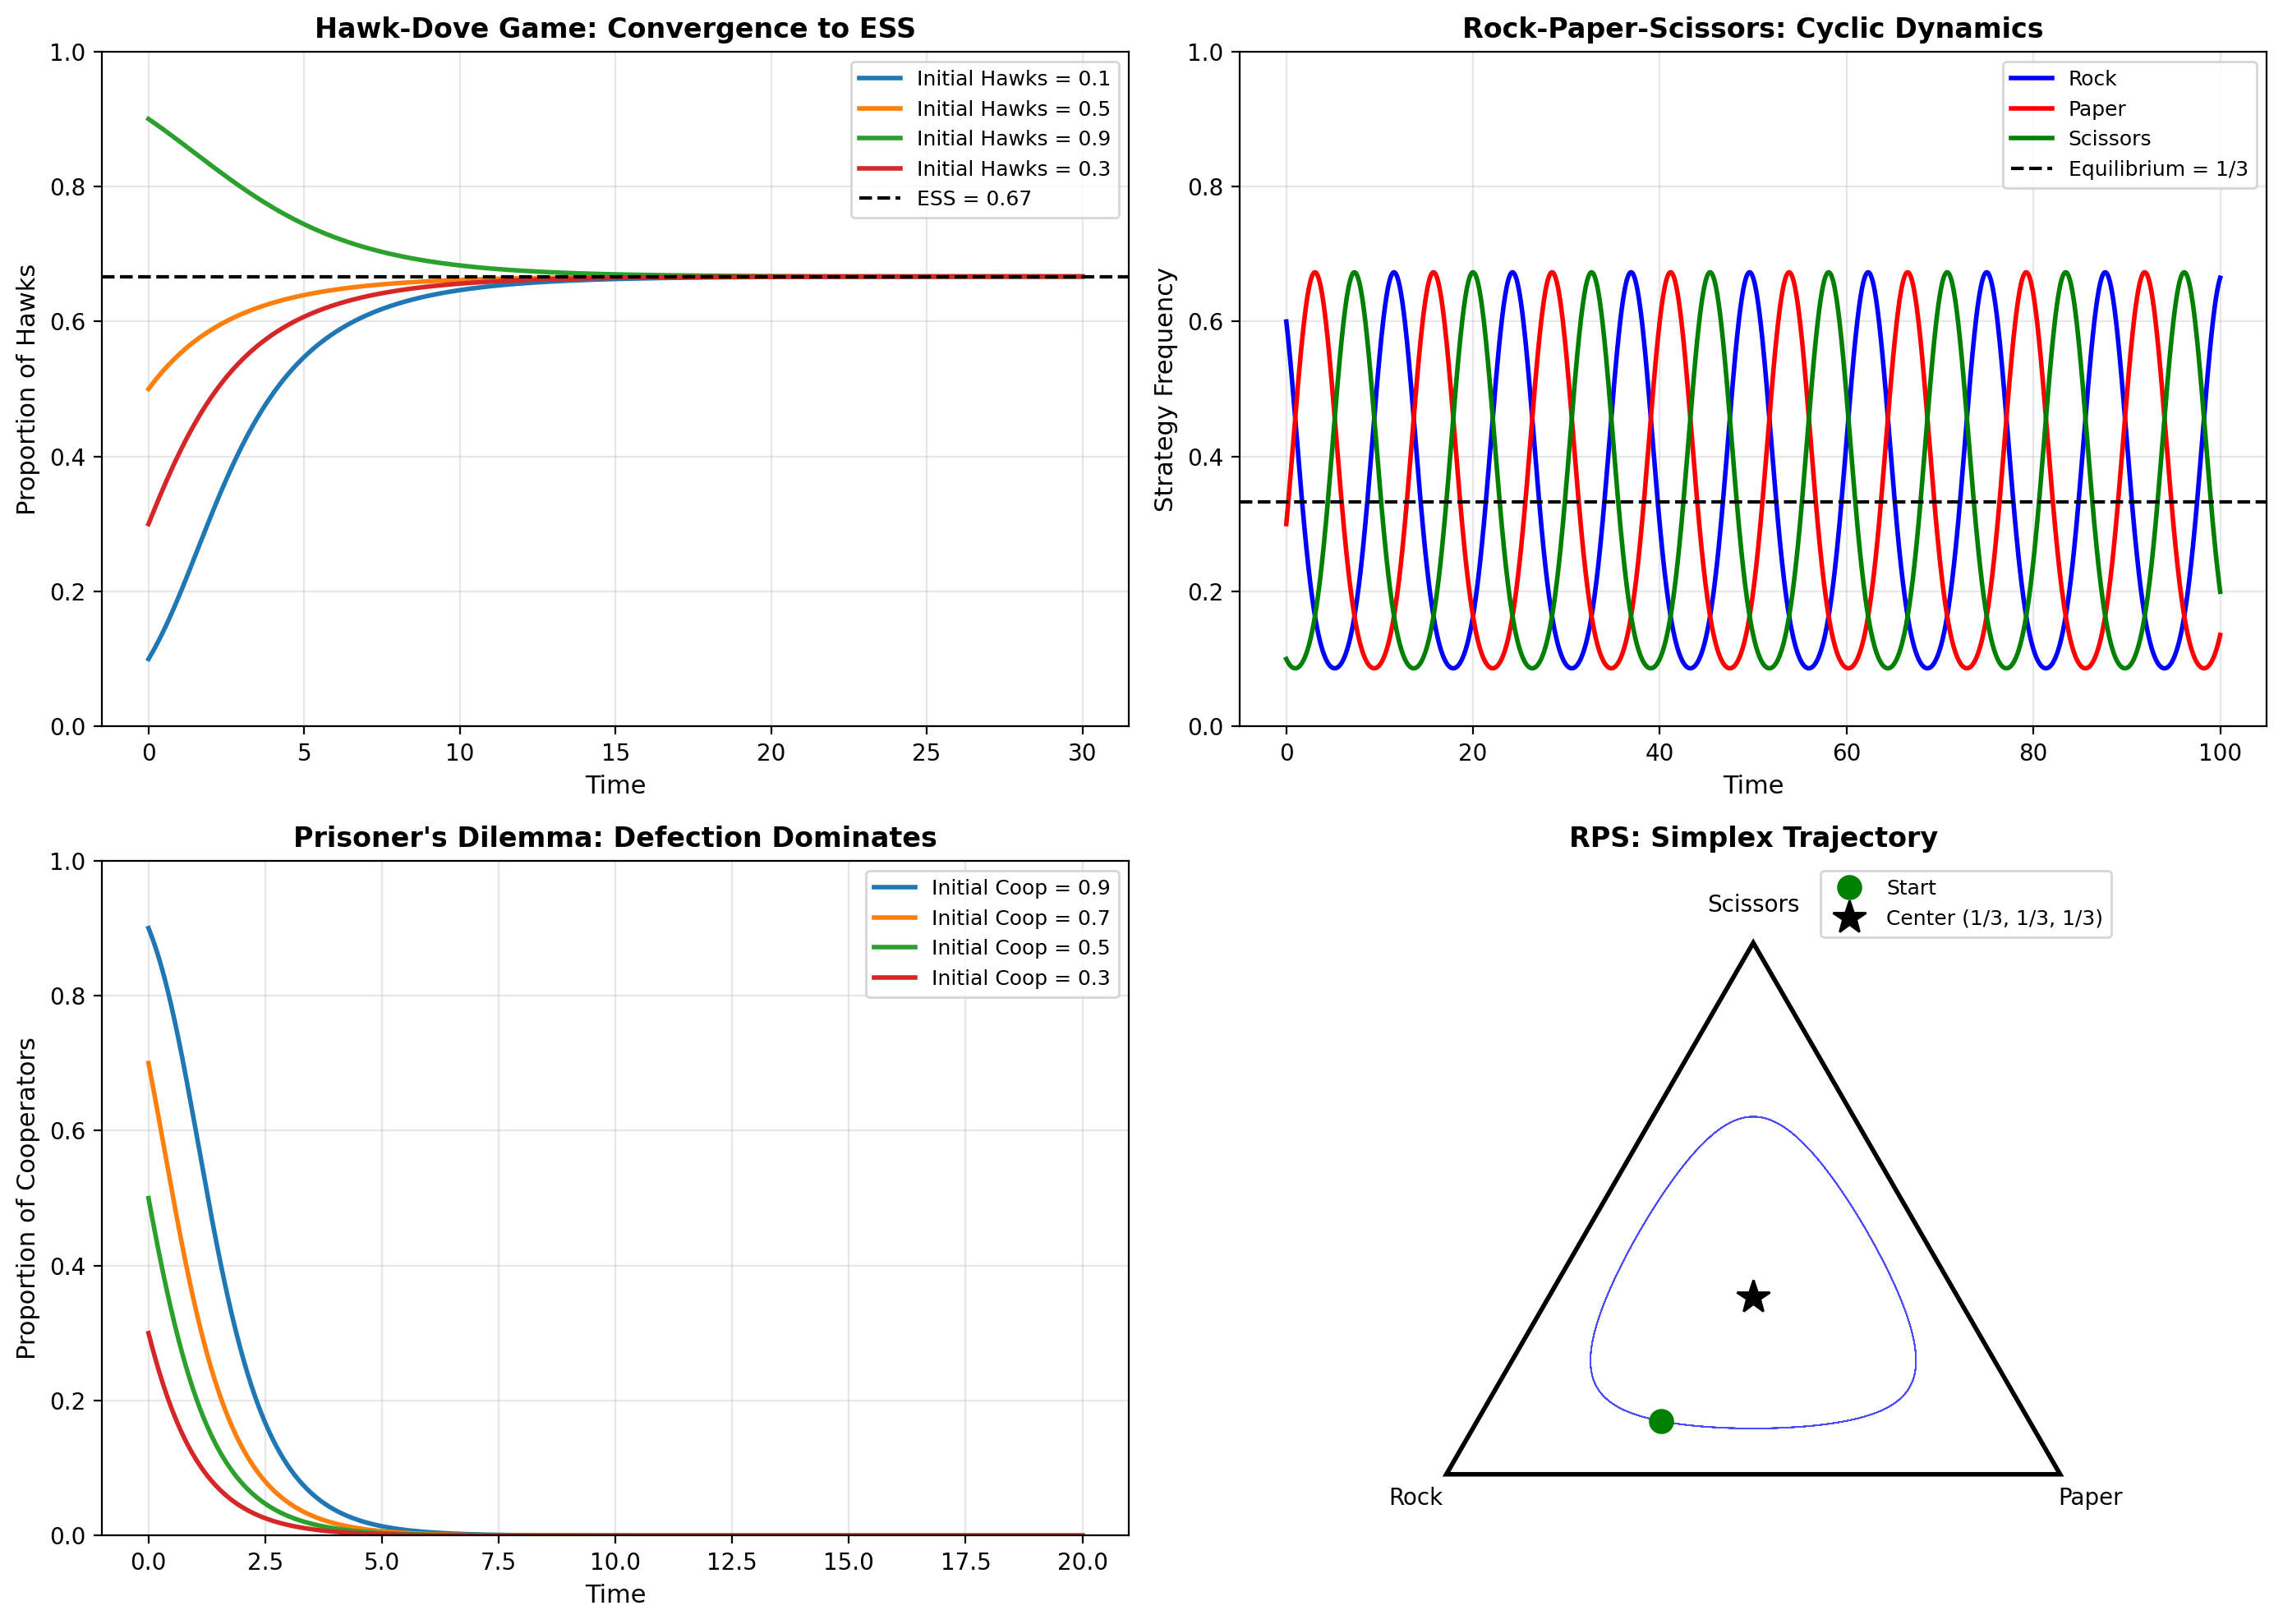


Figure saved to 'plot.png'


In [9]:
fig = plt.figure(figsize=(14, 10))

# Plot 1: Hawk-Dove dynamics
ax1 = fig.add_subplot(2, 2, 1)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, (t, x, x0) in enumerate(hawk_dove_results):
    ax1.plot(t, x[:, 0], color=colors[i], 
             label=f'Initial Hawks = {x0[0]:.1f}', linewidth=2)

ax1.axhline(y=V/C, color='black', linestyle='--', 
            label=f'ESS = {V/C:.2f}', linewidth=1.5)
ax1.set_xlabel('Time', fontsize=11)
ax1.set_ylabel('Proportion of Hawks', fontsize=11)
ax1.set_title('Hawk-Dove Game: Convergence to ESS', fontsize=12, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# Plot 2: Rock-Paper-Scissors dynamics
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(t_rps, x_rps[:, 0], 'b-', label='Rock', linewidth=2)
ax2.plot(t_rps, x_rps[:, 1], 'r-', label='Paper', linewidth=2)
ax2.plot(t_rps, x_rps[:, 2], 'g-', label='Scissors', linewidth=2)
ax2.axhline(y=1/3, color='black', linestyle='--', 
            label='Equilibrium = 1/3', linewidth=1.5)
ax2.set_xlabel('Time', fontsize=11)
ax2.set_ylabel('Strategy Frequency', fontsize=11)
ax2.set_title('Rock-Paper-Scissors: Cyclic Dynamics', fontsize=12, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1)

# Plot 3: Prisoner's Dilemma dynamics
ax3 = fig.add_subplot(2, 2, 3)
for i, (t, x, x0) in enumerate(pd_results):
    ax3.plot(t, x[:, 0], color=colors[i], 
             label=f'Initial Coop = {x0[0]:.1f}', linewidth=2)

ax3.set_xlabel('Time', fontsize=11)
ax3.set_ylabel('Proportion of Cooperators', fontsize=11)
ax3.set_title("Prisoner's Dilemma: Defection Dominates", fontsize=12, fontweight='bold')
ax3.legend(loc='best', fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 1)

# Plot 4: RPS Simplex trajectory
ax4 = fig.add_subplot(2, 2, 4)

# Convert to 2D simplex coordinates
def to_simplex_coords(x):
    """Convert 3D simplex point to 2D coordinates."""
    return x[:, 1] + 0.5 * x[:, 2], np.sqrt(3) / 2 * x[:, 2]

# Plot simplex boundary
triangle = plt.Polygon([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]], 
                        fill=False, edgecolor='black', linewidth=2)
ax4.add_patch(triangle)

# Plot trajectory
coords_x, coords_y = to_simplex_coords(x_rps)
ax4.plot(coords_x, coords_y, 'b-', linewidth=0.5, alpha=0.7)
ax4.plot(coords_x[0], coords_y[0], 'go', markersize=10, label='Start')
ax4.plot(0.5, np.sqrt(3)/6, 'k*', markersize=15, label='Center (1/3, 1/3, 1/3)')

# Label vertices
ax4.text(-0.05, -0.05, 'Rock', fontsize=10, ha='center')
ax4.text(1.05, -0.05, 'Paper', fontsize=10, ha='center')
ax4.text(0.5, np.sqrt(3)/2 + 0.05, 'Scissors', fontsize=10, ha='center')

ax4.set_xlim(-0.1, 1.1)
ax4.set_ylim(-0.1, 1)
ax4.set_aspect('equal')
ax4.axis('off')
ax4.set_title('RPS: Simplex Trajectory', fontsize=12, fontweight='bold')
ax4.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.savefig('evolutionary_game_theory_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Analysis and Conclusions

### Hawk-Dove Game
The simulations demonstrate convergence to the mixed ESS $x^* = V/C$ from all initial conditions. This represents a stable polymorphism where both strategies coexist.

### Rock-Paper-Scissors
The cyclic dynamics show that no pure strategy dominates. The trajectory orbits around the center point $(1/3, 1/3, 1/3)$, which is a neutrally stable fixed point. This demonstrates that in systems with cyclic dominance, biodiversity can be maintained through frequency-dependent selection.

### Prisoner's Dilemma
Regardless of initial conditions, the population evolves toward complete defection. This illustrates the "tragedy of the commons" - individually rational behavior leads to collectively suboptimal outcomes.

### Key Insights

1. **Frequency-dependent selection**: Strategy success depends on population composition
2. **Convergence properties**: Different games exhibit qualitatively different long-term behaviors
3. **ESS as attractors**: Evolutionarily stable strategies act as attractors in replicator dynamics
4. **Social dilemmas**: The divergence between individual and collective optima remains a central challenge

In [10]:
# Summary statistics
print("="*50)
print("SIMULATION SUMMARY")
print("="*50)

print("\nHawk-Dove Game:")
print(f"  ESS (theoretical): {V/C:.4f} Hawks")
print(f"  Final state (avg): {np.mean([x[-1, 0] for _, x, _ in hawk_dove_results]):.4f} Hawks")

print("\nRock-Paper-Scissors:")
print(f"  Final state: R={x_rps[-1, 0]:.4f}, P={x_rps[-1, 1]:.4f}, S={x_rps[-1, 2]:.4f}")
print(f"  Distance from center: {np.linalg.norm(x_rps[-1] - 1/3):.4f}")

print("\nPrisoner's Dilemma:")
print(f"  Final cooperation rate (avg): {np.mean([x[-1, 0] for _, x, _ in pd_results]):.6f}")
print("  Outcome: Defection dominates (as expected)")

SIMULATION SUMMARY

Hawk-Dove Game:
  ESS (theoretical): 0.6667 Hawks
  Final state (avg): 0.6667 Hawks

Rock-Paper-Scissors:
  Final state: R=0.6647, P=0.1356, S=0.1996
  Distance from center: 0.4084

Prisoner's Dilemma:
  Final cooperation rate (avg): 0.000000
  Outcome: Defection dominates (as expected)
